# Sentiment Analysis with Traditional Machine Learning

- This note is based on Text Analytics with Python Ch9 Sentiment Analysis by Dipanjan Sarkar
- Logistic Regression
- Support Vector Machine (SVM)

## Import necessary depencencies

In [195]:
import pandas as pd
import numpy as np
#import text_normalizer as tn
#import model_evaluation_utils as meu
import nltk

np.set_printoptions(precision=2, linewidth=80)

## Load and normalize data

In [196]:
%%time
dataset = pd.read_csv('../data/movie_reviews.csv')

CPU times: user 358 ms, sys: 52.9 ms, total: 411 ms
Wall time: 2.16 s


In [197]:
# take a peek at the data
print(dataset.head())
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [198]:
type(reviews)
reviews.shape
sentiments.shape

(50000,)

In [199]:
# build train and test datasets
train_reviews = reviews[:35000]
train_sentiments = sentiments[:35000]
test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]

In [200]:
reviews[0][:100]
sentiments[0:10]
train_reviews[0][:100]
test_reviews[0][:100]
test_sentiments[0]

'negative'

## Normalizing the Corpus

In [201]:
# normalize datasets
# stop_words = nltk.corpus.stopwords.words('english')
# stop_words.remove('no')
# stop_words.remove('but')
# stop_words.remove('not')

# norm_train_reviews = tn.normalize_corpus(train_reviews, stopwords=stop_words)
# norm_test_reviews = tn.normalize_corpus(test_reviews, stopwords=stop_words)

In [202]:
norm_train_reviews = train_reviews.tolist()
norm_test_reviews = test_reviews.tolist()

## Traditional Supervised Machine Learning Models

- Logistic
- SVM

## Feature Engineering

In [203]:
%%time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=10, max_df=0.7, ngram_range=(1,3))
cv_train_features = cv.fit_transform(norm_train_reviews)
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=10, max_df=0.7, ngram_range=(1,3),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

CPU times: user 59.3 s, sys: 1.96 s, total: 1min 1s
Wall time: 1min 2s


In [204]:
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

In [205]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (35000, 161562)  Test features shape: (15000, 161562)
TFIDF model:> Train features shape: (35000, 161562)  Test features shape: (15000, 161562)


## Model Training, Prediction and Performance Evaluation

In [206]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=200, C=1)
svm = SGDClassifier(loss='hinge', max_iter=200)

:::{note}
`pd.MultiIndex()` has been updated in Sarker's code. The argument `codes=` is new.
:::

In [207]:
# functions from Text Analytics with Python book
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))

def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                codes=level_labels)) 
    print(cm_frame) 
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)
from sklearn import metrics

In [208]:
%%time
# build model    
lr.fit(cv_train_features, train_sentiments)
# predict using model
lr_bow_predictions = lr.predict(cv_test_features) 

    
svm.fit(cv_train_features, train_sentiments)
svm_bow_predictions = svm.predict(cv_test_features)
    
# Logistic Regression model on BOW features
# lr_bow_predictions = meu.train_predict_model(classifier=lr, 
#                                              train_features=cv_train_features, train_labels=train_sentiments,
#                                              test_features=cv_test_features, test_labels=test_sentiments)

/Users/Alvin/opt/anaconda3/envs/ckiptagger/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CPU times: user 28.7 s, sys: 41.3 s, total: 1min 9s
Wall time: 19.8 s


In [209]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions,
                                      classes=['positive','negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.9051
Precision: 0.9052
Recall: 0.9051
F1 Score: 0.9051

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.90      0.91      0.91      7510
    negative       0.91      0.90      0.90      7490

    accuracy                           0.91     15000
   macro avg       0.91      0.91      0.91     15000
weighted avg       0.91      0.91      0.91     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6831      679
        negative        744     6746


In [210]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions,
                                      classes=['positive','negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.897
Precision: 0.8973
Recall: 0.897
F1 Score: 0.897

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.89      0.91      0.90      7510
    negative       0.91      0.88      0.90      7490

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6845      665
        negative        880     6610


In [211]:
from sklearn.metrics import confusion_matrix
lr_bow_cm = confusion_matrix(test_sentiments, lr_bow_predictions)
svm_bow_cm = confusion_matrix(test_sentiments, svm_bow_predictions)
# lr_bow_cm.shape[1]
print(lr_bow_cm)
print(svm_bow_cm)


[[6746  744]
 [ 679 6831]]
[[6610  880]
 [ 665 6845]]


In [212]:
## MultiIndex DataFrame demo
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
# convert array to data frame
classes = ['positive','negative']
lr_bow_df_cm = pd.DataFrame(lr_bow_cm, 
                            index = pd.MultiIndex(levels=[['Actual'],classes],
                                                 codes=[[0,0],[0,1]]),
                            columns = pd.MultiIndex(levels=[['Predicted'],classes],
                                                 codes=[[0,0],[0,1]]))
lr_bow_df_cm

Predicted         
                 positive negative
Actual positive      6746      744
       negative       679     6831

In [213]:
# pd.MultiIndex(levels=[['Predicted:'],['positive', 'negative']],
#              codes=[[0,0],[1,0]])

In [214]:
# classes=['Positive','Negative']
# total_classes = len(classes)
# level_labels = [total_classes*[0], list(range(total_classes))]
# print(total_classes)
# print(level_labels)

In [215]:
svm_bow_df_cm = pd.DataFrame(svm_bow_cm, index = ['positive', 'negative'],
                  columns = ['positive', 'negative'])
svm_bow_df_cm

positive  negative
positive      6610       880
negative       665      6845

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

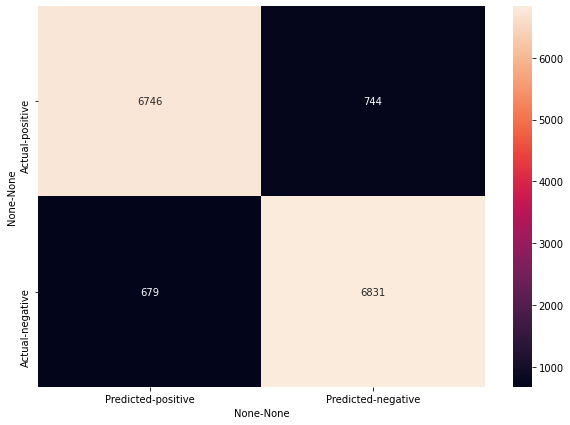

In [216]:
plt.figure(figsize = (10,7))
sn.heatmap(lr_bow_df_cm, annot=True, fmt='.5g')

<AxesSubplot:>

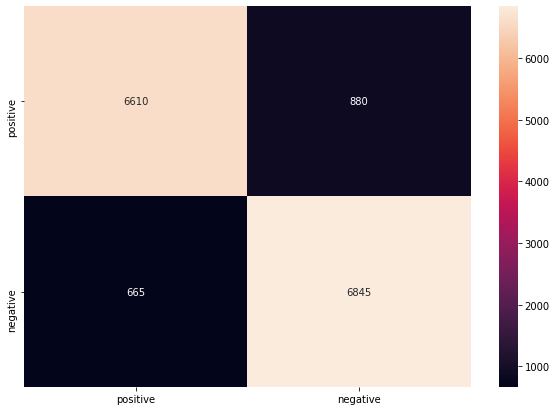

In [217]:
plt.figure(figsize = (10,7))
sn.heatmap(svm_bow_df_cm, annot=True, fmt='.5g')

In [218]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions,classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.9051
Precision: 0.9052
Recall: 0.9051
F1 Score: 0.9051

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.90      0.91      0.91      7510
    negative       0.91      0.90      0.90      7490

    accuracy                           0.91     15000
   macro avg       0.91      0.91      0.91     15000
weighted avg       0.91      0.91      0.91     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6831      679
        negative        744     6746


In [219]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions,classes=['positive', 'negative'])
    

Model Performance metrics:
------------------------------
Accuracy: 0.897
Precision: 0.8973
Recall: 0.897
F1 Score: 0.897

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.89      0.91      0.90      7510
    negative       0.91      0.88      0.90      7490

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6845      665
        negative        880     6610


In [220]:
# Logistic Regression model on TF-IDF features
# lr_tfidf_predictions = meu.train_predict_model(classifier=lr, 
#                                                train_features=tv_train_features, train_labels=train_sentiments,
#                                                test_features=tv_test_features, test_labels=test_sentiments)
#meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_tfidf_predictions,
#                                      classes=['positive', 'negative'])

In [221]:
# svm_bow_predictions = meu.train_predict_model(classifier=svm, 
#                                              train_features=cv_train_features, train_labels=train_sentiments,
#                                              test_features=cv_test_features, test_labels=test_sentiments)
# meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions,
#                                       classes=['positive', 'negative'])

In [222]:
# svm_tfidf_predictions = meu.train_predict_model(classifier=svm, 
#                                                 train_features=tv_train_features, train_labels=train_sentiments,
#                                                 test_features=tv_test_features, test_labels=test_sentiments)
# # meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_tfidf_predictions,
#                                       classes=['positive', 'negative'])

## Explaining Model (LIME)

- See [LIME Documentationb](https://github.com/marcotcr/lime)

In [223]:
from lime import lime_text
from sklearn.pipeline import make_pipeline


c = make_pipeline(cv, lr)
print(c.predict_proba([norm_test_reviews[0]]))

[[0.98 0.02]]


In [224]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=['positive','negative'])

In [225]:
idx = 200
exp = explainer.explain_instance(norm_test_reviews[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(negative) =', c.predict_proba([norm_test_reviews[idx]])[0,1])

print('True class: %s' % test_sentiments[idx])

/Users/Alvin/opt/anaconda3/envs/ckiptagger/lib/python3.6/site-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


Document id: 200
Probability(negative) = 0.9463219141695278
True class: negative


In [226]:
exp.as_list()

[('excellent', 0.162595418803554),
 ('well', 0.12915838814832345),
 ('pretty', -0.12389044715181954),
 ('just', -0.12389037509864227),
 ('is', 0.11544701679553886),
 ('very', 0.11165341872148259)]

In [227]:
print('Original prediction:', lr.predict_proba(cv_test_features[idx])[0,1])
tmp = cv_test_features[idx].copy()
tmp[0,cv.vocabulary_['excellent']] = 0
tmp[0,cv.vocabulary_['see']] = 0
print('Prediction removing some features:', lr.predict_proba(tmp)[0,1])
print('Difference:', lr.predict_proba(tmp)[0,1] - lr.predict_proba(cv_test_features[idx])[0,1])

Original prediction: 0.9463219141695278
Prediction removing some features: 0.7695892761501267
Difference: -0.1767326380194011


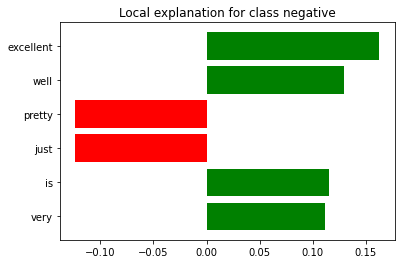

In [228]:
fig = exp.as_pyplot_figure()

In [229]:
exp.show_in_notebook(text=True)

## SVM

In [230]:
from sklearn.calibration import CalibratedClassifierCV 
calibrator = CalibratedClassifierCV(svm, cv='prefit')
svm2=calibrator.fit(cv_train_features, train_sentiments)

c2 = make_pipeline(cv, svm2)
print(c2.predict_proba([norm_test_reviews[0]]))



[[0.9 0.1]]


In [231]:
idx = 200
exp = explainer.explain_instance(norm_test_reviews[idx], c2.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(negative) =', c2.predict_proba([norm_test_reviews[idx]])[0,1])

print('True class: %s' % test_sentiments[idx])

/Users/Alvin/opt/anaconda3/envs/ckiptagger/lib/python3.6/site-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


Document id: 200
Probability(negative) = 0.8529415009424632
True class: negative


In [232]:
exp.as_list()

[('very', 0.1312736594001693),
 ('excellent', 0.12269801222754814),
 ('well', 0.11944614464334685),
 ('fine', 0.10496804950240192),
 ('just', -0.10181362382996519),
 ('pretty', -0.08928942634771304)]

In [233]:
print('Original prediction:', svm2.predict_proba(cv_test_features[idx])[0,1])
tmp = cv_test_features[idx].copy()
tmp[0,cv.vocabulary_['excellent']] = 0
tmp[0,cv.vocabulary_['well']] = 0
print('Prediction removing some features:', svm2.predict_proba(tmp)[0,1])
print('Difference:', svm2.predict_proba(tmp)[0,1] - lr.predict_proba(cv_test_features[idx])[0,1])

Original prediction: 0.8529415009424632
Prediction removing some features: 0.7351422555589386
Difference: -0.21117965861058918


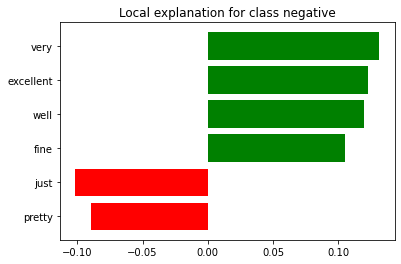

In [234]:
fig = exp.as_pyplot_figure()

In [235]:
exp.show_in_notebook(text=True)